# COSC522 Fall 2022 Final Project

## Team Members
Dan Scott <br>
Adam McDaniel<br>
Logan Wrinkle<br>

In [1]:
%%html
<style>
table {float:left}
</style>

### There are 8+1 classes; in clockwise order starting at 12 o'clock position

| No |   Clas ID   |   Direction      |
|:----:|:-------------:|:----------------|
|1|  D0   |  up       |
|2|  D1   |  up-right   |
|3|  D2   |  right      |
|4|  D3   |  down-right |
|5|  D4   |  down      |
|6|  D5   |  down-left |
|7|  D6   |  left      |
|8|  D7   |  up-left   |
|9|  D99  |  No Input  |




In [2]:
import numpy as np
import pandas as pd
import os
from glob import glob
import time
from datetime import datetime
import datetime
import csv
import matplotlib.pyplot as plt
# from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import *
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score


In [3]:
root = os.getcwd()
data = '..\\data\\'

#list of all CSV files in directory
list_of_all_files = glob(os.path.join(data, 'out*.csv'))
list_of_all_files.sort()
from pprint import pprint  
pprint(list(enumerate(list_of_all_files, start=0)))

[(0, '..\\data\\output_3_01.csv'),
 (1, '..\\data\\output_4_01.csv'),
 (2, '..\\data\\output_5_01.csv'),
 (3, '..\\data\\output_5_02.csv'),
 (4, '..\\data\\output_5_3.csv')]


# Process data, load data

### Load from CSV (not pandas)

In [4]:
#General purpose read CSV with NO data types infered
def getCSVData(fname):
    List_data=[]
    with open(fname) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print(f'{row}')
            else:
                List_data.append(row)
            line_count+=1  
    return List_data

#This is the 3-LDR sensor data
df_3 = pd.DataFrame(getCSVData(list_of_all_files[0]), columns=['TimeNS', 'LDR0', 'LDR1', 'LDR2', 'Class'])

#This is the 4-LDR sensor data
df_4 = pd.DataFrame(getCSVData(list_of_all_files[1]), columns=['TimeNS', 'LDR0', 'LDR1', 'LDR2', 'LDR3', 'Class'])

#This is the 5-LDR sensor data
# df_5_1 = pd.DataFrame(getCSVData(list_of_all_files[2]), columns=['TimeNS', 'LDR0', 'LDR1', 'LDR2', 'LDR3', 'LDR4', 'Class', 'UNK'])
df_5_1 = pd.DataFrame(getCSVData(list_of_all_files[2]), columns=['TimeNS', 'LDR0', 'LDR1', 'LDR2', 'LDR3', 'LDR4', 'Class'])
# df_5_1.drop('UNK', axis=1, inplace = True)

df_5_2 = pd.DataFrame(getCSVData(list_of_all_files[3]), columns=['TimeNS', 'LDR0', 'LDR1', 'LDR2', 'LDR3', 'LDR4', 'Class'])


df_5_3 = pd.DataFrame(getCSVData(list_of_all_files[4]), columns=['TimeNS', 'LDR0', 'LDR1', 'LDR2', 'LDR3', 'LDR4', 'Class'])


['TIME', 'LDR0', 'LDR1', 'LDR2', 'CLASS']
['Time', 'LDR0', 'LDR1', 'LDR2', 'LDR3', 'Class']
['Time', 'LDR0', 'LDR1', 'LDR2', 'LDR3', 'LDR4', 'Class']
['Time', 'LDR0', 'LDR1', 'LDR2', 'LDR3', 'LDR4', 'Class']
['Time', 'LDR0', 'LDR1', 'LDR2', 'LDR3', 'LDR4', 'Class']


### Fix data types

In [5]:
# s = (1667824000.498999)
# ts = time.ctime(s)
# print(ts)

# Which data used may cause caclulation errors ??
# LDR_Data_type = 'int64'
LDR_Data_type = 'int64'

#Fix the data types for LDR
df_3['TimeNS'] = df_3['TimeNS'].apply(lambda x: datetime.datetime.fromtimestamp(float(x)).strftime('%c'))
df_3['LDR0'] = df_3['LDR0'].astype(LDR_Data_type)
df_3['LDR1'] = df_3['LDR1'].astype(LDR_Data_type)
df_3['LDR2'] = df_3['LDR2'].astype(LDR_Data_type)

df_4['TimeNS'] = df_4['TimeNS'].apply(lambda x: datetime.datetime.fromtimestamp(float(x)).strftime('%c'))
df_4['LDR0'] = df_4['LDR0'].astype(LDR_Data_type)
df_4['LDR1'] = df_4['LDR1'].astype(LDR_Data_type)
df_4['LDR2'] = df_4['LDR2'].astype(LDR_Data_type)
df_4['LDR3'] = df_4['LDR3'].astype(LDR_Data_type)

#Combine both files for Pentagon LDR data
# df_5 = pd.concat([df_5_1, df_5_2],ignore_index=True)
df_5_1['TimeNS'] = df_5_1['TimeNS'].apply(lambda x: datetime.datetime.fromtimestamp(float(x)).strftime('%c'))
df_5_1['LDR0'] = df_5_1['LDR0'].astype(LDR_Data_type)
df_5_1['LDR1'] = df_5_1['LDR1'].astype(LDR_Data_type)
df_5_1['LDR2'] = df_5_1['LDR2'].astype(LDR_Data_type)
df_5_1['LDR3'] = df_5_1['LDR3'].astype(LDR_Data_type)
df_5_1['LDR4'] = df_5_1['LDR4'].astype(LDR_Data_type)

df_5_2['TimeNS'] = df_5_2['TimeNS'].apply(lambda x: datetime.datetime.fromtimestamp(float(x)).strftime('%c'))
df_5_2['LDR0'] = df_5_2['LDR0'].astype(LDR_Data_type)
df_5_2['LDR1'] = df_5_2['LDR1'].astype(LDR_Data_type)
df_5_2['LDR2'] = df_5_2['LDR2'].astype(LDR_Data_type)
df_5_2['LDR3'] = df_5_2['LDR3'].astype(LDR_Data_type)
df_5_2['LDR4'] = df_5_2['LDR4'].astype(LDR_Data_type)


df_5_3['TimeNS'] = df_5_3['TimeNS'].apply(lambda x: datetime.datetime.fromtimestamp(float(x)).strftime('%c'))
df_5_3['LDR0'] = df_5_3['LDR0'].astype(LDR_Data_type)
df_5_3['LDR1'] = df_5_3['LDR1'].astype(LDR_Data_type)
df_5_3['LDR2'] = df_5_3['LDR2'].astype(LDR_Data_type)
df_5_3['LDR3'] = df_5_3['LDR3'].astype(LDR_Data_type)
df_5_3['LDR4'] = df_5_3['LDR4'].astype(LDR_Data_type)


In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis

#Calculate skew accross columns
df_5_1['skw'] = skew([df_5_1['LDR0'] ,df_5_1['LDR1'],df_5_1['LDR2'],df_5_1['LDR3'],df_5_1['LDR4']])
df_5_1['krt'] = kurtosis([df_5_1['LDR0'] ,df_5_1['LDR1'],df_5_1['LDR2'],df_5_1['LDR3'],df_5_1['LDR4']])

#Validation data is the second data set (df_5_2)
df_5_2['skw'] = skew([df_5_2['LDR0'] ,df_5_2['LDR1'],df_5_2['LDR2'],df_5_2['LDR3'],df_5_2['LDR4']])
df_5_2['krt'] = kurtosis([df_5_2['LDR0'] ,df_5_2['LDR1'],df_5_2['LDR2'],df_5_2['LDR3'],df_5_2['LDR4']])

# Exploratory Data Analysis

The second data capture for the 5-LDR had a weaker ambient light.  Perhaps we should split apart each class set before applying a standard scaler.  That way, the data for the first class, first set of data would have a near normal scale.

### 3LDR Data

<AxesSubplot:>

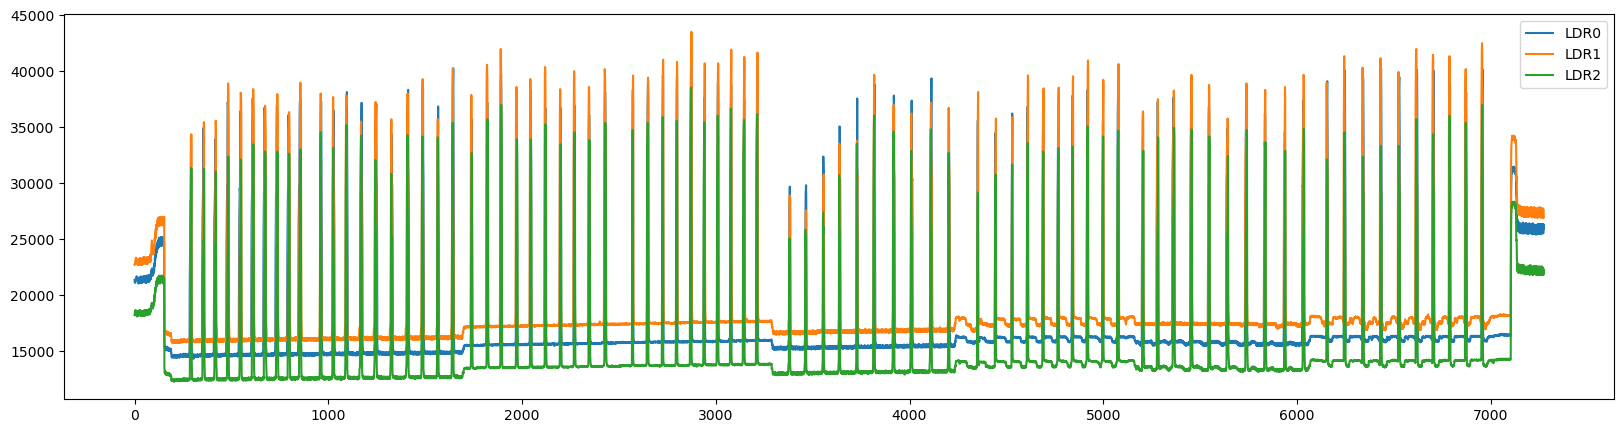

In [8]:
df_3.plot(figsize=(20, 5))

### 4LDR Data

<AxesSubplot:>

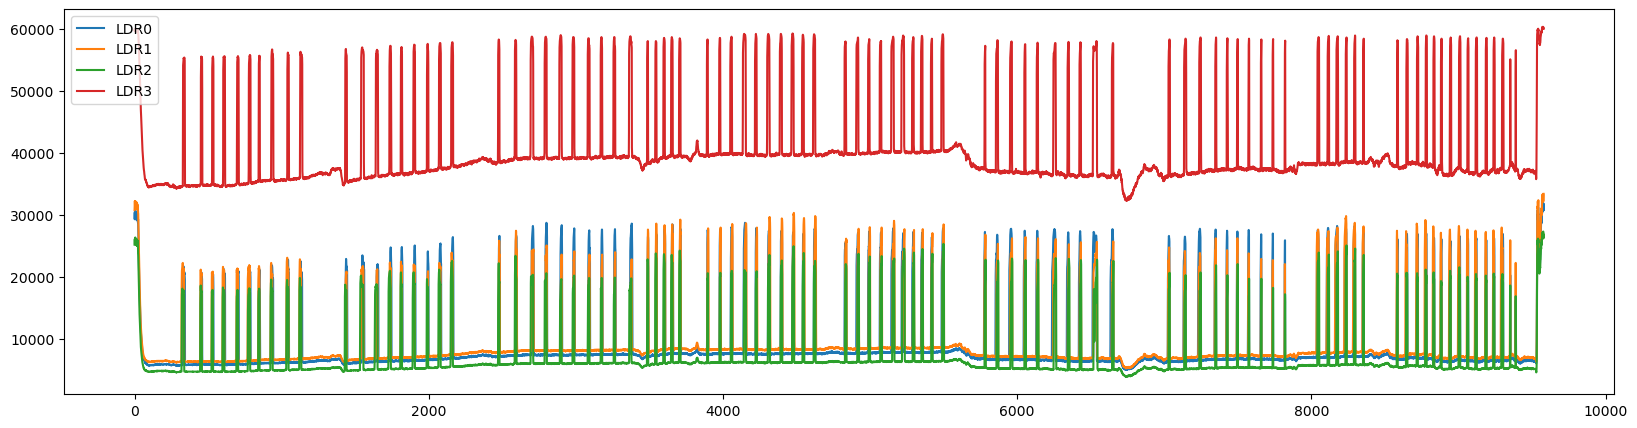

In [9]:
df_4.plot(figsize=(20, 5))

### 5LDR Data

<AxesSubplot:>

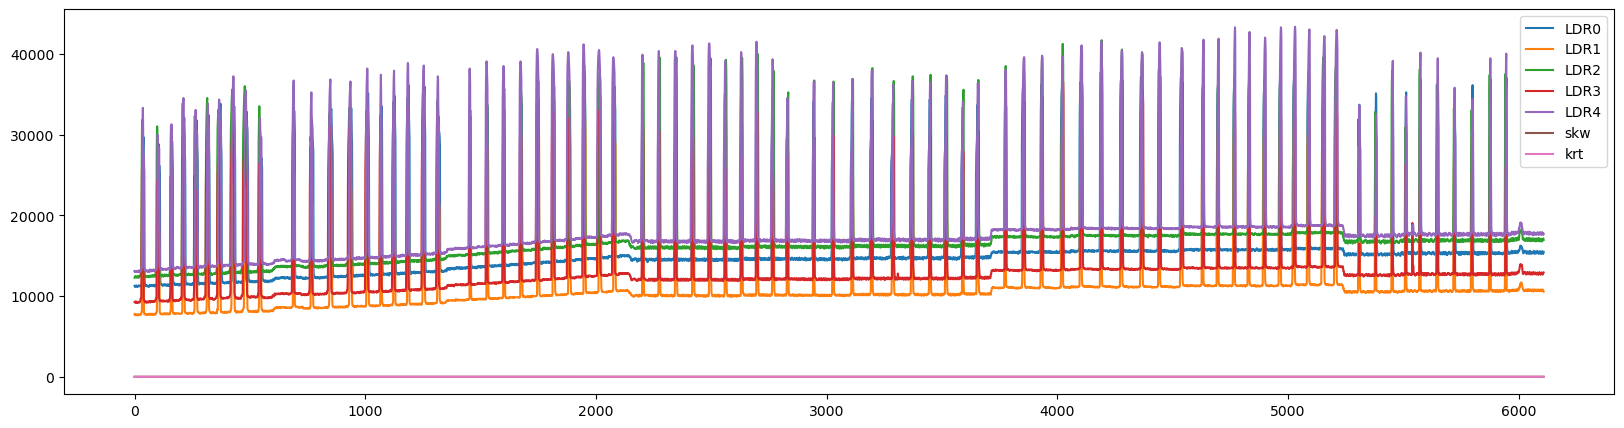

In [10]:
df_5_1.plot(figsize=(20, 5))

### 5LDR Data - validation set

<AxesSubplot:>

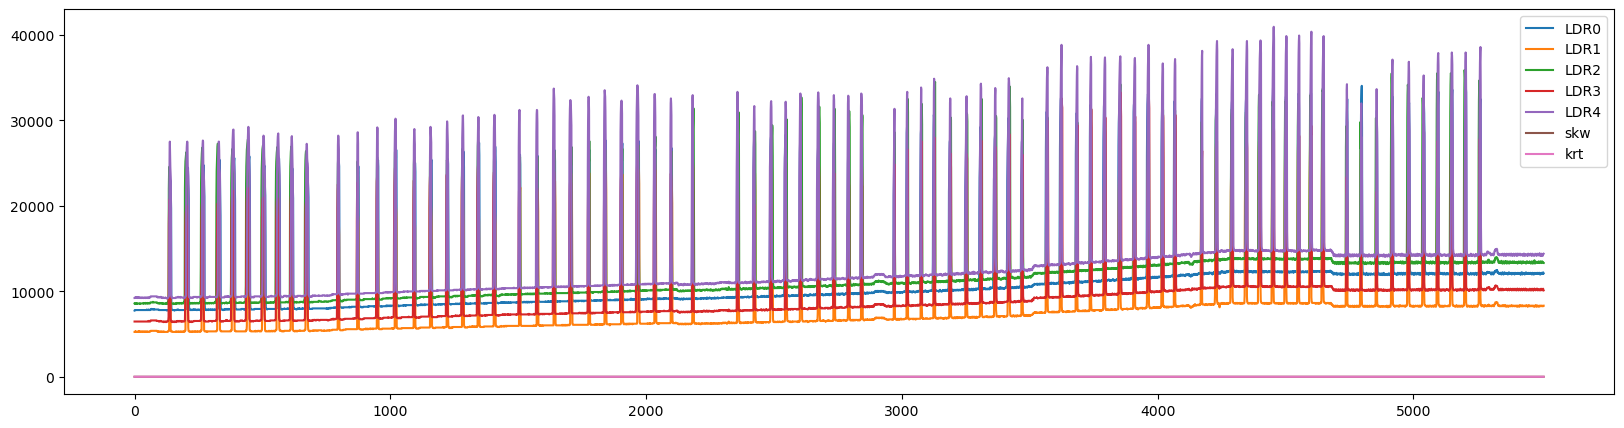

In [11]:
df_5_2.plot(figsize=(20, 5))

<AxesSubplot:>

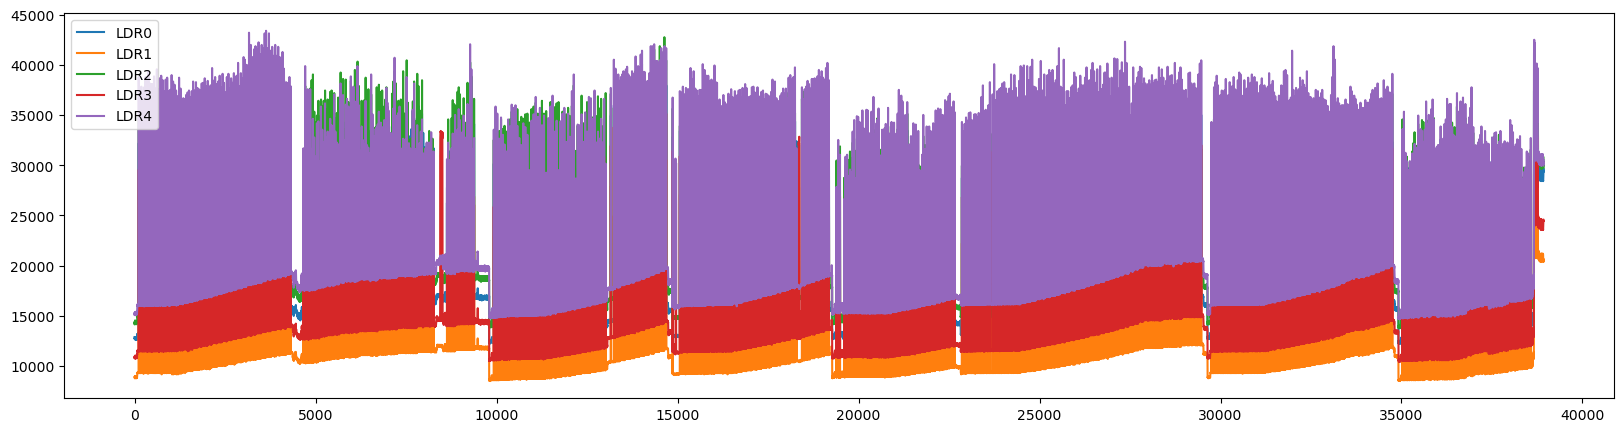

In [12]:
df_5_3.plot(figsize=(20, 5))

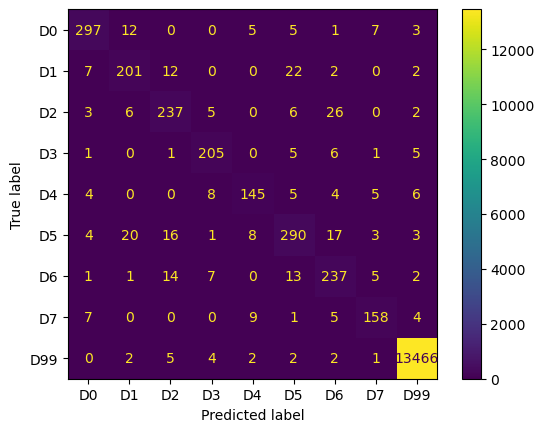

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# disp.plot()

## XGBoost

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [22]:
from xgboost import XGBClassifier
#training the model
clf = XGBClassifier(learning_rate=0.5, n_estimators=50)

# columns = ['std_acc_z','std_acc_y','std_acc_x','std_gyr_z','std_gyr_y','std_gyr_x']

clf.fit(X_train, y_train)
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Average Cross Validation Score from Training:', cv_scores.mean(), sep='\n', end='\n\n\n')

#testing the model
ypred = clf.predict(X_test)
cm = confusion_matrix(y_test, ypred)
cr = classification_report(y_test, ypred)

print('Confusion Matrix:', cm, sep='\n', end='\n\n\n')
print('Test Statistics:', cr, sep='\n', end='\n\n\n')

#This is what we will be grading (>95 expected)
print('Testing Accuracy:', accuracy_score(y_test, ypred))

Average Cross Validation Score from Training:
0.9773504187322167


Confusion Matrix:
[[  297     8     1     1     9     5     3     5     1]
 [    7   196    12     0     0    27     3     0     1]
 [    3    12   230     4     0    12    22     0     2]
 [    1     0     1   207     2     3     5     1     4]
 [    9     0     0     7   139     4     5     8     5]
 [    5    20    16     0     6   291    19     2     3]
 [    1     0    14     7     0    12   243     2     1]
 [    7     0     0     0     6     5     4   159     3]
 [    1     3     2     2     2     2     3     1 13468]]


Test Statistics:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       330
           1       0.82      0.80      0.81       246
           2       0.83      0.81      0.82       285
           3       0.91      0.92      0.92       224
           4       0.85      0.79      0.82       177
           5       0.81      0.80      0.80       362
   

### 5 LDR Test set = 97.8%

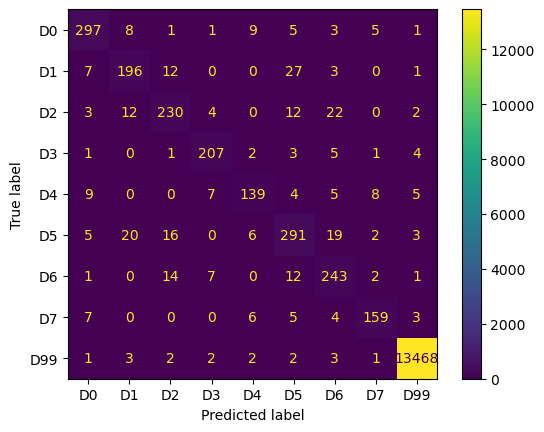

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

# End of row/class models

# Use the second set as a validation set and check the models accuracy

In [24]:
#now use df_5_1 as a validation set
# copy the data
df_validation_scaled = df_5_1.copy()
  
# apply normalization techniques by each column NORMALIZE values [0-1]
columns = ['LDR0','LDR1','LDR2','LDR3','LDR4']
for column in columns:
    df_validation_scaled[column] = (df_validation_scaled[column] - df_validation_scaled[column].min()) / (df_validation_scaled[column].max() - df_validation_scaled[column].min())    

df_validation_scaled.head()

,TimeNS,LDR0,LDR1,LDR2,LDR3,LDR4,Class,skw,krt
0,Sun Nov 6 20:44:25 2022,0.004751,0.005115,0.000000,0.004338,0.004211,D99,-0.329235,-1.373456
1,Sun Nov 6 20:44:25 2022,0.002375,0.002558,0.002174,0.002169,0.004211,D99,-0.316960,-1.393915
2,Sun Nov 6 20:44:25 2022,0.000000,0.005115,0.004348,0.002169,0.000000,D99,-0.314920,-1.426793
3,Sun Nov 6 20:44:25 2022,0.002375,0.002558,0.004348,0.002169,0.002105,D99,-0.332697,-1.407195
4,Sun Nov 6 20:44:25 2022,0.002375,0.002558,0.006522,0.004338,0.000000,D99,-0.359503,-1.389251


In [25]:
# columns = ['LDR0','LDR1','LDR2','LDR3','LDR4','skw','krt']
columns = ['LDR0','LDR1','LDR2','LDR3','LDR4']
features_valid_df = df_validation_scaled[columns]
labels_valid = df_validation_scaled['Class']

y_valid = model.predict(features_valid_df)
cm = confusion_matrix(labels_valid, y_valid)
cr = classification_report(labels_valid, y_valid)

print('Confusion Matrix:', cm, sep='\n', end='\n\n\n')
print('Test Statistics:', cr, sep='\n', end='\n\n\n')

#This is what we will be grading (>95 expected)
print('Testing Accuracy:', accuracy_score(labels_valid, y_valid))

Confusion Matrix:
[[  96    0    0   16    9    4    3   31    4]
 [  44   55    0    9    3   30    8    4    5]
 [   8   30   61    0    0   24   10    0    5]
 [   8    4   32   69    0    8    1    0    5]
 [  42    2    0   47   10   18    1    0    1]
 [  51   21    1    0    0   33    0    0   22]
 [  14   41   15    9    0   20   19    0    8]
 [  13    2   11   38    1   14    8    0    2]
 [  10    0    0    1    3    1    2    3 5040]]


Test Statistics:
              precision    recall  f1-score   support

          D0       0.34      0.59      0.43       163
          D1       0.35      0.35      0.35       158
          D2       0.51      0.44      0.47       138
          D3       0.37      0.54      0.44       127
          D4       0.38      0.08      0.14       121
          D5       0.22      0.26      0.24       128
          D6       0.37      0.15      0.21       126
          D7       0.00      0.00      0.00        89
         D99       0.99      1.00      0.99

In [26]:
type(model)

sklearn.ensemble._forest.RandomForestClassifier

## Validaion Accuracy for RF 

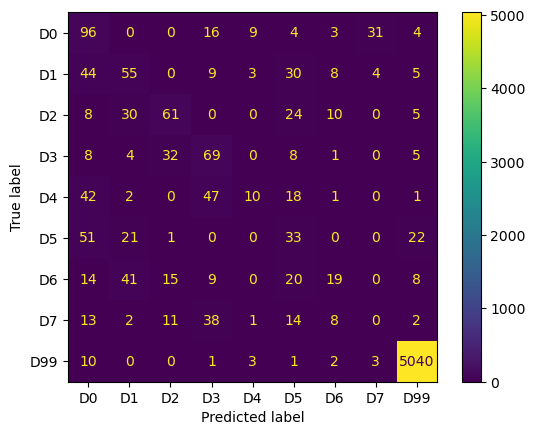

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

# Matrix type models

In [28]:
df_5_1.head()

,TimeNS,LDR0,LDR1,LDR2,LDR3,LDR4,Class,skw,krt
0,Sun Nov 6 20:44:25 2022,11264,7744,12288,9280,13120,D99,-0.329235,-1.373456
1,Sun Nov 6 20:44:25 2022,11200,7680,12352,9216,13120,D99,-0.316960,-1.393915
2,Sun Nov 6 20:44:25 2022,11136,7744,12416,9216,12992,D99,-0.314920,-1.426793
3,Sun Nov 6 20:44:25 2022,11200,7680,12416,9216,13056,D99,-0.332697,-1.407195
4,Sun Nov 6 20:44:25 2022,11200,7680,12480,9280,12992,D99,-0.359503,-1.389251


In [29]:
N=10
PCT = 0.01
#Calculate the rolling window average for N rows
df_5_1['AVG_LDR0'] = df_5_1['LDR0'].rolling(N).mean()
df_5_1['AVG_LDR1'] = df_5_1['LDR1'].rolling(N).mean()
df_5_1['AVG_LDR2'] = df_5_1['LDR2'].rolling(N).mean()
df_5_1['AVG_LDR3'] = df_5_1['LDR3'].rolling(N).mean()
df_5_1['AVG_LDR4'] = df_5_1['LDR4'].rolling(N).mean()

#calculate the PCT change from the previous row of the movign average
df_5_1['CHG_LDR0'] = df_5_1['AVG_LDR0'].pct_change()
df_5_1['CHG_LDR1'] = df_5_1['AVG_LDR1'].pct_change()
df_5_1['CHG_LDR2'] = df_5_1['AVG_LDR2'].pct_change()
df_5_1['CHG_LDR3'] = df_5_1['AVG_LDR3'].pct_change()
df_5_1['CHG_LDR4'] = df_5_1['AVG_LDR4'].pct_change()

#if the PCT change of the rolling average is >= %PCT% (0.01), then create a flag 
df_5_1['BIN_LDR0'] = df_5_1['CHG_LDR0'].apply(lambda x: 1 if x >= PCT else 0)
df_5_1['BIN_LDR1'] = df_5_1['CHG_LDR1'].apply(lambda x: 1 if x >= PCT else 0)
df_5_1['BIN_LDR2'] = df_5_1['CHG_LDR2'].apply(lambda x: 1 if x >= PCT else 0)
df_5_1['BIN_LDR3'] = df_5_1['CHG_LDR3'].apply(lambda x: 1 if x >= PCT else 0)
df_5_1['BIN_LDR4'] = df_5_1['CHG_LDR4'].apply(lambda x: 1 if x >= PCT else 0)

#accumulate the flags
df_5_1['BIN_SUM'] = df_5_1['BIN_LDR0'] + df_5_1['BIN_LDR1'] + df_5_1['BIN_LDR2'] + df_5_1['BIN_LDR3'] + df_5_1['BIN_LDR4'] 
df_5_1['STARTMTX'] = df_5_1['BIN_SUM'].apply(lambda x: 1 if x > 0 else 0)


df_5_2['AVG_LDR0'] = df_5_2['LDR0'].rolling(N).mean()
df_5_2['AVG_LDR1'] = df_5_2['LDR1'].rolling(N).mean()
df_5_2['AVG_LDR2'] = df_5_2['LDR2'].rolling(N).mean()
df_5_2['AVG_LDR3'] = df_5_2['LDR3'].rolling(N).mean()
df_5_2['AVG_LDR4'] = df_5_2['LDR4'].rolling(N).mean()

df_5_2['CHG_LDR0'] = df_5_2['AVG_LDR0'].pct_change()
df_5_2['CHG_LDR1'] = df_5_2['AVG_LDR1'].pct_change()
df_5_2['CHG_LDR2'] = df_5_2['AVG_LDR2'].pct_change()
df_5_2['CHG_LDR3'] = df_5_2['AVG_LDR3'].pct_change()
df_5_2['CHG_LDR4'] = df_5_2['AVG_LDR4'].pct_change()

df_5_2['BIN_LDR0'] = df_5_2['CHG_LDR0'].apply(lambda x: 1 if x >= PCT else 0)
df_5_2['BIN_LDR1'] = df_5_2['CHG_LDR1'].apply(lambda x: 1 if x >= PCT else 0)
df_5_2['BIN_LDR2'] = df_5_2['CHG_LDR2'].apply(lambda x: 1 if x >= PCT else 0)
df_5_2['BIN_LDR3'] = df_5_2['CHG_LDR3'].apply(lambda x: 1 if x >= PCT else 0)
df_5_2['BIN_LDR4'] = df_5_2['CHG_LDR4'].apply(lambda x: 1 if x >= PCT else 0)

df_5_2['BIN_SUM'] = df_5_2['BIN_LDR0'] + df_5_2['BIN_LDR1'] + df_5_2['BIN_LDR2'] + df_5_2['BIN_LDR3'] + df_5_2['BIN_LDR4'] 
df_5_2['STARTMTX'] = df_5_2['BIN_SUM'].apply(lambda x: 1 if x > 0 else 0)




df_5_3['AVG_LDR0'] = df_5_3['LDR0'].rolling(N).mean()
df_5_3['AVG_LDR1'] = df_5_3['LDR1'].rolling(N).mean()
df_5_3['AVG_LDR2'] = df_5_3['LDR2'].rolling(N).mean()
df_5_3['AVG_LDR3'] = df_5_3['LDR3'].rolling(N).mean()
df_5_3['AVG_LDR4'] = df_5_3['LDR4'].rolling(N).mean()

df_5_3['CHG_LDR0'] = df_5_3['AVG_LDR0'].pct_change()
df_5_3['CHG_LDR1'] = df_5_3['AVG_LDR1'].pct_change()
df_5_3['CHG_LDR2'] = df_5_3['AVG_LDR2'].pct_change()
df_5_3['CHG_LDR3'] = df_5_3['AVG_LDR3'].pct_change()
df_5_3['CHG_LDR4'] = df_5_3['AVG_LDR4'].pct_change()

df_5_3['BIN_LDR0'] = df_5_3['CHG_LDR0'].apply(lambda x: 1 if x >= PCT else 0)
df_5_3['BIN_LDR1'] = df_5_3['CHG_LDR1'].apply(lambda x: 1 if x >= PCT else 0)
df_5_3['BIN_LDR2'] = df_5_3['CHG_LDR2'].apply(lambda x: 1 if x >= PCT else 0)
df_5_3['BIN_LDR3'] = df_5_3['CHG_LDR3'].apply(lambda x: 1 if x >= PCT else 0)
df_5_3['BIN_LDR4'] = df_5_3['CHG_LDR4'].apply(lambda x: 1 if x >= PCT else 0)

df_5_3['BIN_SUM']  = df_5_3['BIN_LDR0'] + df_5_3['BIN_LDR1'] + df_5_3['BIN_LDR2'] + df_5_3['BIN_LDR3'] + df_5_3['BIN_LDR4'] 
df_5_3['STARTMTX'] = df_5_3['BIN_SUM'].apply(lambda x: 1 if x > 0 else 0)






In [30]:
R=155
df_5_1.iloc[R:R+20]

,TimeNS,LDR0,LDR1,LDR2,LDR3,LDR4,Class,skw,krt,AVG_LDR0,...,CHG_LDR2,CHG_LDR3,CHG_LDR4,BIN_LDR0,BIN_LDR1,BIN_LDR2,BIN_LDR3,BIN_LDR4,BIN_SUM,STARTMTX
155,Sun Nov 6 20:44:30 2022,11328,8064,13760,10944,13696,D0,-0.485113,-1.010234,11353.6,...,0.009068,0.017532,0.002872,0,0,0,1,0,1,1
156,Sun Nov 6 20:44:30 2022,11392,8128,26880,22400,13696,D0,0.336201,-1.480726,11366.4,...,0.111333,0.135189,0.002864,0,0,1,1,0,2,1
157,Sun Nov 6 20:44:30 2022,11456,8192,29952,24832,13888,D0,0.377322,-1.521336,11372.8,...,0.121743,0.140105,0.003808,0,0,1,1,0,2,1
158,Sun Nov 6 20:44:30 2022,11712,14208,31040,22592,16704,D0,0.667536,-0.953605,11398.4,...,0.116139,0.105479,0.024656,0,1,1,1,1,4,1
159,Sun Nov 6 20:44:30 2022,11712,20800,28864,21568,29248,D0,-0.497160,-0.988196,11424.0,...,0.091496,0.088004,0.114762,0,1,1,1,1,4,1
160,Sun Nov 6 20:44:30 2022,18496,22912,27968,21632,31296,D0,0.257514,-1.335743,12140.8,...,0.079224,0.081311,0.115401,1,1,1,1,1,5,1
161,Sun Nov 6 20:44:30 2022,26240,19968,27584,21632,29312,D0,-0.248737,-1.572691,13625.6,...,0.071581,0.075591,0.092668,1,1,1,1,1,5,1
162,Sun Nov 6 20:44:30 2022,28608,18752,26624,21696,29184,D0,-0.438832,-1.473087,15360.0,...,0.060830,0.068814,0.084128,1,1,1,1,1,5,1
163,Sun Nov 6 20:44:30 2022,28416,18112,18304,18624,29184,D0,0.412003,-1.816785,17075.2,...,0.021972,0.047603,0.077914,1,1,1,1,1,5,1
164,Sun Nov 6 20:44:30 2022,27200,14464,13056,9920,29120,D0,0.316865,-1.726005,18656.0,...,-0.000262,0.000327,0.071699,1,1,0,0,1,3,1


In [31]:
df_5_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TimeNS    6110 non-null   object 
 1   LDR0      6110 non-null   int64  
 2   LDR1      6110 non-null   int64  
 3   LDR2      6110 non-null   int64  
 4   LDR3      6110 non-null   int64  
 5   LDR4      6110 non-null   int64  
 6   Class     6110 non-null   object 
 7   skw       6110 non-null   float64
 8   krt       6110 non-null   float64
 9   AVG_LDR0  6101 non-null   float64
 10  AVG_LDR1  6101 non-null   float64
 11  AVG_LDR2  6101 non-null   float64
 12  AVG_LDR3  6101 non-null   float64
 13  AVG_LDR4  6101 non-null   float64
 14  CHG_LDR0  6100 non-null   float64
 15  CHG_LDR1  6100 non-null   float64
 16  CHG_LDR2  6100 non-null   float64
 17  CHG_LDR3  6100 non-null   float64
 18  CHG_LDR4  6100 non-null   float64
 19  BIN_LDR0  6110 non-null   int64  
 20  BIN_LDR1  6110 non-null   int6

In [32]:
# iterating over rows using iterrows() function
indxs=[]
j=0
cls='D99'
for index, row in df_5_1.iterrows():
    if row['STARTMTX'] == 1:
        cls=row['Class']
        if (index != (j)):
            if (index != (j+1)):
                indxs.append([index,cls])
                # print (index, cls)
            cls=row['Class']
            j=index
                
new_data=[]
for a,b in indxs:
    # new_data.append([df_5_1.iloc[a:a+20,1:6].values.flatten(),b])
    new_data.append([df_5_1.iloc[a:a+20,19:24].values.flatten(),b])

    
new_df_1 = pd.DataFrame(new_data,columns=['mtx_data','Class'])
new_df_1.to_csv('..\\data\\MTX_100_ITEM_5_1.csv',index=False)


In [33]:
# iterating over rows using iterrows() function
indxs=[]
j=0
cls='D99'
for index, row in df_5_2.iterrows():
    if row['STARTMTX'] == 1:
        cls=row['Class']
        if (index != (j)):
            if (index != (j+1)):
                indxs.append([index,cls])
                # print (index, cls)
            cls=row['Class']
            j=index
                
new_data=[]
for a,b in indxs:
    # new_data.append([df_5_2.iloc[a:a+20,1:6].values.flatten(),b])
    new_data.append([df_5_2.iloc[a:a+20,19:24].values.flatten(),b])

    
new_df_2 = pd.DataFrame(new_data,columns=['mtx_data','Class'])
new_df_2.to_csv('..\\data\\MTX_100_ITEM_5_2.csv',index=False)



In [34]:
# iterating over rows using iterrows() function
indxs=[]
j=0
cls='D99'
for index, row in df_5_3.iterrows():
    if row['STARTMTX'] == 1:
        cls=row['Class']
        if (index != (j)):
            if (index != (j+1)):
                indxs.append([index,cls])
                # print (index, cls)
            cls=row['Class']
            j=index
                
new_data=[]
for a,b in indxs:
    # new_data.append([df_5_2.iloc[a:a+20,1:6].values.flatten(),b])
    new_data.append([df_5_3.iloc[a:a+20,19:24].values.flatten(),b])

    
new_df_3 = pd.DataFrame(new_data,columns=['mtx_data','Class'])
new_df_3.to_csv('..\\data\\MTX_100_ITEM_5_3.csv',index=False)


In [35]:

new_df_3.head(10)

,mtx_data,Class
0,"[0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 4, 1, ...",D2
1,"[0, 1, 1, 2, 1, 0, 1, 1, 3, 1, 1, 1, 1, 5, 1, ...",D2
2,"[0, 1, 1, 2, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, ...",D2
3,"[0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 5, 1, ...",D2
4,"[0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 3, 1, ...",D2
5,"[0, 1, 1, 2, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, ...",D2
6,"[0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 5, 1, ...",D2
7,"[0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 5, 1, ...",D2
8,"[0, 1, 1, 2, 1, 0, 1, 1, 3, 1, 1, 1, 1, 5, 1, ...",D2
9,"[0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 5, 1, ...",D2


In [36]:
new_df_1['Class'].value_counts()

D0     10
D1     10
D2     10
D3     10
D4     10
D5     10
D6     10
D7     10
D99     1
Name: Class, dtype: int64

In [37]:
new_df_2['Class'].value_counts()

D0    10
D1    10
D2    10
D3    10
D4    10
D5    10
D6    10
D7    10
Name: Class, dtype: int64

In [38]:
new_df_3['Class'].value_counts()

D99    152
D5     144
D6     133
D3      99
D1      93
D2      90
D0      87
D7      82
D4      81
Name: Class, dtype: int64

In [39]:
## Try a general MLP Classifier

In [40]:
from sklearn.neural_network import MLPClassifier
X = new_df_3['mtx_data'].tolist()
y = new_df_3['Class'].ravel()

le = LabelEncoder()
y_labels = le.fit_transform(y)


clf = MLPClassifier(random_state=42, hidden_layer_sizes=(100, 10), max_iter=300)
clf.fit(X, y_labels)


X2 = new_df_2['mtx_data'].tolist()
y2 = new_df_2['Class'].ravel()

le = LabelEncoder()
y2_labels = le.fit_transform(y2)


clf.score(X2, y2_labels)




C:\Users\DannyScott\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.0125

# XGBoost with all columns 

In [41]:

df_1 = pd.concat([new_df_1['mtx_data'].apply(pd.Series), new_df_1['Class']], axis = 1)

df_2 = pd.concat([new_df_2['mtx_data'].apply(pd.Series), new_df_2['Class']], axis = 1)

df_3 = pd.concat([new_df_3['mtx_data'].apply(pd.Series), new_df_3['Class']], axis = 1)


In [42]:
# new_df_1['mtx_data']
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Class
0,0,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,D0
1,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,D0
2,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,D0
3,0,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,D0
4,0,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,D0


In [43]:
from sklearn.preprocessing import LabelEncoder
X1 = df_1.iloc[:,:-1]
X2 = df_2.iloc[:,:-1]
X3 = df_3.iloc[:,:-1]

le = LabelEncoder()
y1 = le.fit_transform(df_1['Class'])
y2 = le.fit_transform(df_2['Class'])
y3 = le.fit_transform(df_3['Class'])


In [44]:
X3

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,1,1,1,0,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,2,1,0,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,2,1,1,1,1,5,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,1,0,0,1,1,1,1,0,3,1,...,0,0,0,0,0,0,0,0,0,0
957,1,0,0,1,1,1,1,1,4,1,...,0,0,0,0,0,0,0,0,0,0
958,1,1,1,4,1,1,1,1,5,1,...,0,0,0,0,0,0,0,0,0,0
959,0,1,1,2,1,0,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [45]:
from xgboost import XGBClassifier
#training the model
clf = XGBClassifier(learning_rate=0.5, n_estimators=100)

clf.fit(X3, y3)
cv_scores = cross_val_score(clf, X3, y3, cv=10)
print('Average Cross Validation Score from Training:', cv_scores.mean(), sep='\n', end='\n\n\n')

#testing the model
ypred = clf.predict(X2)
cm = confusion_matrix(y2, ypred)
cr = classification_report(y2, ypred)

print('Confusion Matrix:', cm, sep='\n', end='\n\n\n')
print('Test Statistics:', cr, sep='\n', end='\n\n\n')

#This is what we will be grading (>95 expected)
print('Testing Accuracy:', accuracy_score(y2, ypred))

Average Cross Validation Score from Training:
0.7971327319587629


Confusion Matrix:
[[ 0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  5  0  0  5]
 [ 0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0  0]]


Test Statistics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      10.0
           1       0.00      0.00      0.00      10.0
           2       0.00      0.00      0.00      10.0
           3       0.00      0.00      0.00      10.0
           4       0.00      0.00      0.00      10.0
           5       0.00      0.00      0.00      10.0
           6       0.00      0.00      0.00      10.0
           7       0.00      0.00      0.00      10.0
           8       0.00      0.00      0.00       0.0

    accuracy                           0.00      80.0
   macro avg       0.00      

C:\Users\DannyScott\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DannyScott\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DannyScott\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DannyScott\anac

In [ ]:
# Random Forest all columns

In [47]:
#training the model
from sklearn.datasets import make_classification

model = RandomForestClassifier(random_state=1,n_estimators=50,criterion='log_loss',class_weight='balanced')

model.fit(X1, y1)

cv_scores = cross_val_score(model, X1, y1, cv=2)
print('Average Cross Validation Score from Training:', cv_scores.mean(), sep='\n', end='\n\n\n')

#testing the model
ypred = model.predict(X2)
cm = confusion_matrix(y2, ypred)
cr = classification_report(y2, ypred)

print('Confusion Matrix:', cm, sep='\n', end='\n\n\n')
print('Test Statistics:', cr, sep='\n', end='\n\n\n')

#This is what we will be grading (>95 expected)
print('Testing Accuracy:', accuracy_score(y2, ypred))

C:\Users\DannyScott\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Average Cross Validation Score from Training:
0.7795731707317073


Confusion Matrix:
[[ 9  0  0  0  0  0  0  1]
 [ 2  3  0  0  0  0  0  5]
 [ 0  0 10  0  0  0  0  0]
 [ 0  0  0  5  5  0  0  0]
 [ 0  0  0  0  9  0  0  1]
 [ 0  0  0  0  2  7  1  0]
 [ 0  0  0  0  0  0  8  2]
 [ 0  0  0  0  0  0  0 10]]


Test Statistics:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       1.00      0.30      0.46        10
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67        10
           4       0.56      0.90      0.69        10
           5       1.00      0.70      0.82        10
           6       0.89      0.80      0.84        10
           7       0.53      1.00      0.69        10

    accuracy                           0.76        80
   macro avg       0.85      0.76      0.75        80
weighted avg       0.85      0.76      0.75        80



Testing Accuracy: 0.7625


## Grid Search - searching for best RF Parameters

In [48]:
#Plot all the parameters from the grid search 
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

C:\Users\DannyScott\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


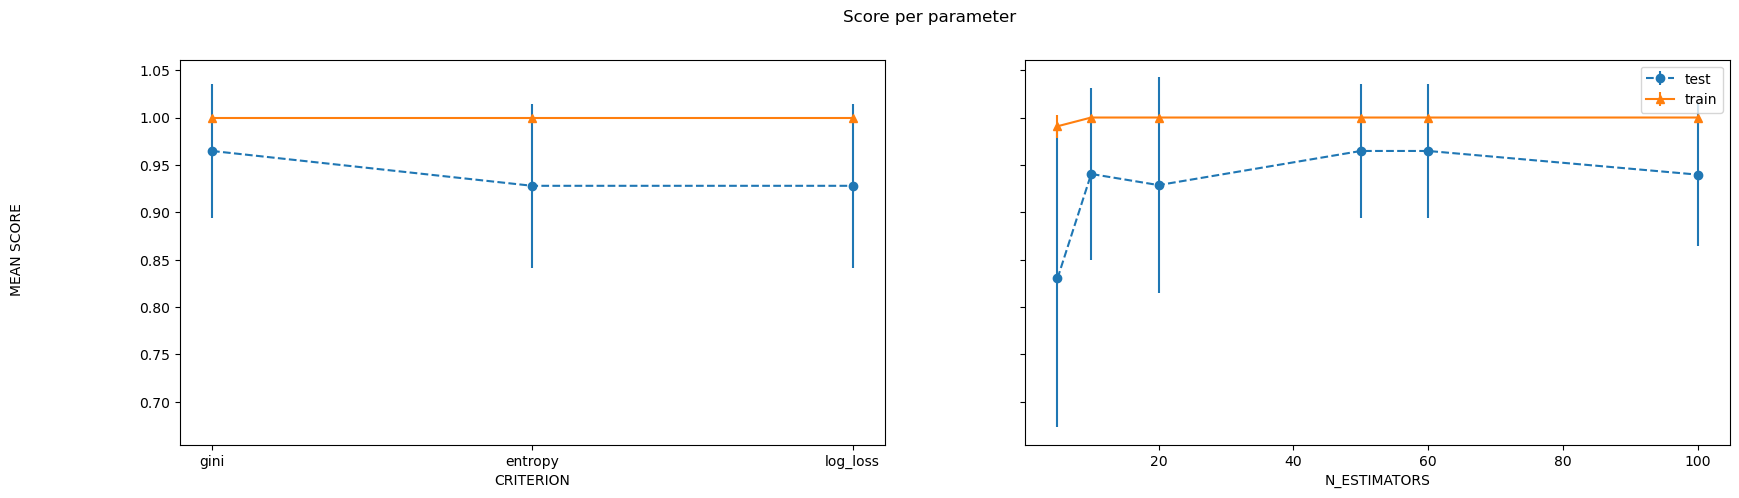

In [49]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators':[5, 10, 20, 50, 60, 100], 
               'criterion':('gini','entropy','log_loss'),
             }

RFst = RandomForestClassifier(random_state=52)
# clf = GridSearchCV(RFst, parameters, cv=10, return_train_score=True)
clf = GridSearchCV(RFst, parameters, return_train_score=True)

clf.fit(X1, y1)

plot_search_results(clf)

In [50]:
print(clf.best_params_)

{'criterion': 'gini', 'n_estimators': 50}
